<a href="https://colab.research.google.com/github/claragomes1/titanic_challenge/blob/main/titanic_versao2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXERĆICIO MINERAÇÃO DE DADOS [BCC-444] - LIMPEZA E TRANFORMAÇÃO DOS DADOS**


**Alunos:** 

Michele Soares de Andrade - 20.1.4171 

Gabriel Bruno Pereira Negri - 19.1.4976

Clara Lóris de Sales Gomes - 18.2.4004


**Desafio:** [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic)



### 1 - a) TIPOS DE ATRIBUTOS

**PassengerId:** Atributo discreto, que identifica cada passageiro de forma única

**Survived:** Atributo binário simétrico, que indica se o passageiro sobreviveu (1) ou não sobreviveu (0). As duas categorias têm a mesma relevância.

**Pclass:** Atributo discreto, que indica a classe que o passageiro estava viajando. Podendo ser 1, 2 ou 3.

**Name:** Atributo categórico nominal, que contém o nome completo do passageiro. Não possui uma ordem específica entre suas categorias.

**Sex:** Atriuto binário, que indica o sexo do passadeiro, podendo ser feminino o masculino. As duas categorias têm a mesma relevância

**Age:** Atributo contínuo, representa a idade dos passageiros e pode assumir qualquer valor dentro de um intervalo

**SibSp:** Atributo discreto, representa o número de irmãos ou cônjuges a bordo

**Parch:** Atributo discreto, representa o nḿero de pais ou filhos a bordo

**Ticket:** Atributo categórico nominal, que representa o número do bilhete do passageiro. Não possui uma ordem específica entre suas categorias.

**Fare:** Atributo contínuo, representa a tarifa paga pelo passageiro. Pode assumir infinitos valores dentro de um intervalo contínuo

**Cabin:** Atributo categórico nominal, representa a cabine que o passageiro estava. Identificado por letras e números sem uma ordem específica






In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Leitura dos dados

In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
submission_data = pd.read_csv('gender_submission.csv')

### b ) ANÁLISE DOS ATRIBUTOS NUMÉRICOS

              Age        Fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200


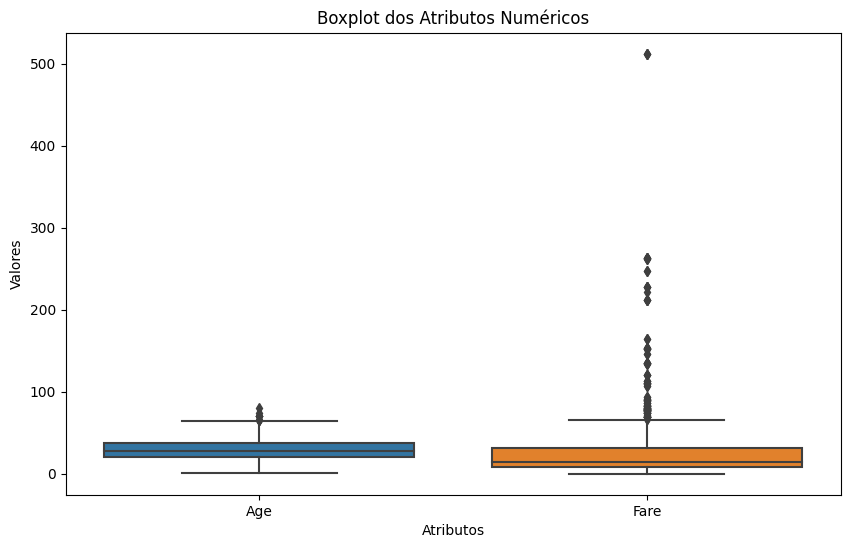

In [ ]:
atributos_numericos = ['Age', 'Fare']
atributos_descricao = train_data[atributos_numericos].describe()
print(atributos_descricao)

# Gráfico estilo boxplot para visualizar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data[atributos_numericos])
plt.title('Boxplot dos Atributos Numéricos')
plt.xlabel('Atributos')
plt.ylabel('Valores')
plt.show()

**AGE**

* **Contagem (count):**Temos 714 valores não nulos para o atributo "Age", o que significa que existem algumas amostras que possuem valores ausentes (NaN) para a idade.

* **Média (mean):** A média de idade dos passageiros é de aproximadamente 29.7 anos.

* **Desvio-padrão (std):** O desvio-padrão de 14.5 indica a dispersão dos valores de idade em relação à média. Nesse caso, o desvio-padrão de 14.5 sugere que as idades dos passageiros variam consideravelmente.

* **Valor mínimo (min):** O valor mínimo de 0.42 indica a idade mínima encontrada no conjunto de dados. Isso significa que há passageiros com idades próximas de um mês.

* **Primeiro quartil (25%):** O primeiro quartil (25%) é igual a 20.125. Isso significa que 25% dos passageiros têm idade igual ou inferior a 20.125 anos.

* **Mediana (50%):** A mediana, também conhecida como segundo quartil (50%), é igual a 28.0. Isso indica que metade dos passageiros tem idade abaixo de 28 anos.

* **Terceiro quartil (75%):** O terceiro quartil (75%) é igual a 38.0. Isso significa que 75% dos passageiros têm idade igual ou inferior a 38.0 anos.

* **Valor máximo (max):** O valor máximo de 80.0 indica a idade máxima encontrada no conjunto de dados. Isso significa que há passageiros com idades de até 80 anos.

**FARE**

* **Contagem (count):** O atributo "Fare" não possui valores ausentes, pois a contagem (count) é igual ao número total de amostras (891).

* **Média (mean):** A média de tarifas dos passageiros é de aproximadamente 32.2. Esse valor representa o valor médio gasto pelos passageiros no conjunto de dados.

* **Desvio-padrão (std):** O desvio-padrão de 49.7 indica uma dispersão significativa dos valores de tarifa em relação à média. Isso sugere que os passageiros gastaram uma variedade de valores diferentes nas tarifas.

* **Valor mínimo (min):** O valor mínimo de 0.0 indica que há passageiros que não pagaram nenhuma tarifa, o que pode ser o caso de tripulações ou passageiros com tarifas isentas.

* **Primeiro quartil (25%):** O primeiro quartil (25%) é igual a 7.9104. Isso significa que 25% dos passageiros pagaram uma tarifa igual ou inferior a 7.9104.

* **Mediana (50%):** O valor do segundo quartil (mediana) é de 14.4542. Isso indica que 50% dos passageiros pagaram uma tarifa abaixo desse valor.

* **Terceiro quartil (75%):** O valor do terceiro quartil é de 31. Isso significa que 75% dos passageiros pagaram uma tarifa abaixo desse valor.

* **Valor máximo (max):** O valor máximo de tarifa é 512.3292, indicando que há passageiros que pagaram uma tarifa muito alta.



### c) INDICAÇÃO DE VALORES POSSÍVEIS E POPULARIDADE PARA  ATRIBUTOS BINÁRIOS, NOMINAIS E ORDINAIS

In [ ]:
# Atributo binário - Survived
survived_counts = train_data['Survived'].value_counts()
survived_prob = survived_counts / survived_counts.sum()

print("Atributo binário - Survived:")
print("Valores possíveis:", survived_counts.index.tolist())
print("Popularidade de cada valor:")
print(survived_prob)

# Atributo binário - Sex
sex_counts = train_data['Sex'].value_counts()
sex_prob = sex_counts / sex_counts.sum()

print("\nAtributo binário - Sex:")
print("Valores possíveis:", sex_counts.index.tolist())
print("Popularidade de cada valor:")
print(sex_prob)

# Atributo binário - Embarked
embarked_counts = train_data['Embarked'].value_counts()
embarked_prob = embarked_counts / embarked_counts.sum()

print("\nAtributo binário - Embarked:")
print("Valores possíveis:", embarked_counts.index.tolist())
print("Popularidade de cada valor:")
print(embarked_prob)

# Atributo nominal - Pclass
pclass_counts = train_data['Pclass'].value_counts()
pclass_prob = pclass_counts / pclass_counts.sum()

print("\nAtributo nominal - Pclass:")
print("Valores possíveis:", pclass_counts.index.tolist())
print("Popularidade de cada valor:")
print(pclass_prob)

# Atributo nominal - Cabin
cabin_counts = train_data['Cabin'].value_counts()
cabin_prob = cabin_counts / cabin_counts.sum()

print("\nAtributo nominal - Cabin:")
print("Valores possíveis:", cabin_counts.index.tolist())
print("Popularidade de cada valor:")
print(cabin_prob)

# Atributo ordinal - SibSp
sibsp_counts = train_data['SibSp'].value_counts()
sibsp_prob = sibsp_counts / sibsp_counts.sum()

print("\nAtributo ordinal - SibSp:")
print("Valores possíveis:", sibsp_counts.index.tolist())
print("Popularidade de cada valor:")
print(sibsp_prob)

# Atributo ordinal - Parch
parch_counts = train_data['Parch'].value_counts()
parch_prob = parch_counts / parch_counts.sum()

print("\nAtributo ordinal - Parch:")
print("Valores possíveis:", parch_counts.index.tolist())
print("Popularidade de cada valor:")
print(parch_prob)

# Atributo ordinal - Embarked
embarked_counts = train_data['Embarked'].value_counts()
embarked_prob = embarked_counts / embarked_counts.sum()

print("\nAtributo ordinal - Embarked:")
print("Valores possíveis:", embarked_counts.index.tolist())
print("Popularidade de cada valor:")
print(embarked_prob)

# Atributo ordinal - Age
age_counts = train_data['Age'].value_counts()
age_prob = age_counts / age_counts.sum()

print("\nAtributo ordinal - Age:")
print("Valores possíveis:", age_counts.index.tolist())
print("Popularidade de cada valor:")
print(age_prob)

# Atributo ordinal - Fare
fare_counts = train_data['Fare'].value_counts()
fare_prob = fare_counts / fare_counts.sum()

print("\nAtributo ordinal - Fare:")
print("Valores possíveis:", fare_counts.index.tolist())
print("Popularidade de cada valor:")
print(fare_prob)



Atributo binário - Survived:
Valores possíveis: [0, 1]
Popularidade de cada valor:
0    0.616162
1    0.383838
Name: Survived, dtype: float64

Atributo binário - Sex:
Valores possíveis: ['male', 'female']
Popularidade de cada valor:
male      0.647587
female    0.352413
Name: Sex, dtype: float64

Atributo binário - Embarked:
Valores possíveis: ['S', 'C', 'Q']
Popularidade de cada valor:
S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

Atributo nominal - Pclass:
Valores possíveis: [3, 1, 2]
Popularidade de cada valor:
3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

Atributo nominal - Cabin:
Valores possíveis: ['B96 B98', 'G6', 'C23 C25 C27', 'C22 C26', 'F33', 'F2', 'E101', 'D', 'C78', 'C93', 'E8', 'D36', 'B77', 'C123', 'E121', 'E44', 'D35', 'C125', 'E67', 'B35', 'B18', 'E24', 'B49', 'C65', 'B20', 'B5', 'B57 B59 B63 B66', 'C126', 'B51 B53 B55', 'F4', 'C124', 'F G73', 'B58 B60', 'C52', 'D33', 'C68', 'D20', 'D26', 'B28', 'C83', 'E25', 'D17',

d ) VALORES AUSENTES

In [ ]:
# Verificar valores ausentes no DataFrame
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

VALORES ABERRANTES

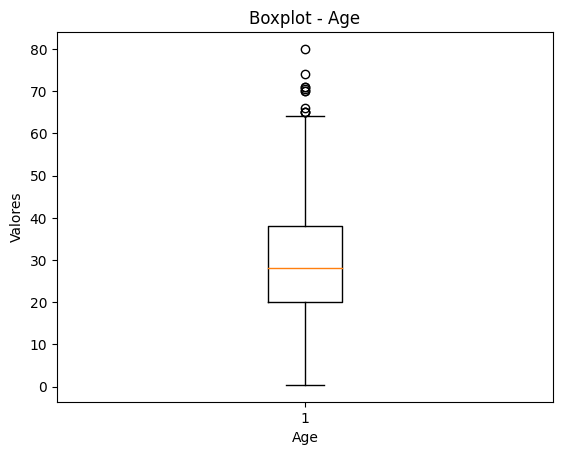

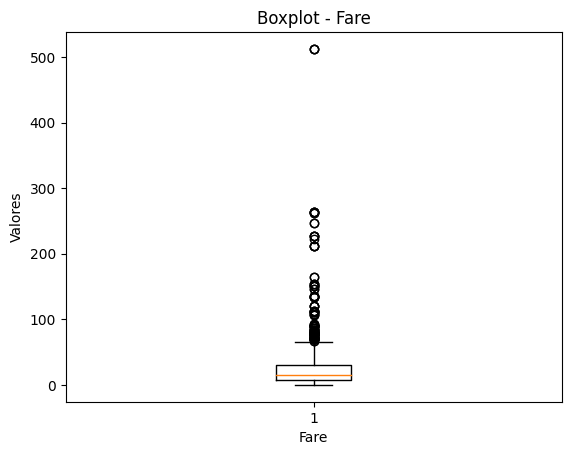

In [ ]:

# Identificar valores aberrantes para atributos numéricos
numeric_attributes = ['Age', 'Fare']
for attribute in numeric_attributes:
    plt.boxplot(train_data[attribute].dropna())
    plt.xlabel(attribute)
    plt.ylabel('Valores')
    plt.title(f'Boxplot - {attribute}')
    plt.show()


É possível identificar valores aberrantes dos atributos numéricos pela analise feita anteriormente. Analisando o atributo Fare, podemos perceber que o valor mínimo de 0 indica que há passageiros que não pagaram tarifa ou cujo valor não foi registrado. Dependendo do contexto, esses valores podem ser considerados como outliers, pois são extremamente baixos em comparação com a maioria dos passageiros que pagaram tarifa. O valor máximo de 512.3292 indica que há passageiros que pagaram uma tarifa muito alta. Esses valores também podem ser considerados outliers, pois estão bem acima da maioria dos valores de tarifa.

VERIFICANDO INCOSISTÊNCIAS

In [ ]:
#Verificar se existem valores diferentes de "male" e "female" no atributo "Sex"
sex_values = train_data['Sex'].unique()
inconsistent_sex_values = [value for value in sex_values if value not in ['male', 'female']]
print("Valores inconsistentes encontrados no atributo 'Sex':", inconsistent_sex_values)


#Verificar se existem valores diferentes de "S", "C" e "Q" no atributo "Embarked"
embarked_values = train_data['Embarked'].unique()
inconsistent_embarked_values = [value for value in embarked_values if value not in ['S', 'C', 'Q']]
print("Valores inconsistentes encontrados no atributo 'Embarked':", inconsistent_embarked_values)


#Verificar se existem valores diferentes de 1, 2 e 3 no atributo "Pclass"
pclass_values = train_data['Pclass'].unique()
inconsistent_pclass_values = [value for value in pclass_values if value not in [1, 2, 3]]
print("Valores inconsistentes encontrados no atributo 'Pclass':", inconsistent_pclass_values)


#Verificar se existem valores negativos no atributo "SibSp"
negative_sibsp_values = train_data[train_data['SibSp'] < 0]['SibSp']
print("Valores negativos encontrados no atributo 'SibSp':", negative_sibsp_values)


#Verificar se existem valores negativos no atributo "Parch"
negative_parch_values = train_data[train_data['Parch'] < 0]['Parch']
print("Valores negativos encontrados no atributo 'Parch':", negative_parch_values)


Valores inconsistentes encontrados no atributo 'Sex': []
Valores inconsistentes encontrados no atributo 'Embarked': [nan]
Valores inconsistentes encontrados no atributo 'Pclass': []
Valores negativos encontrados no atributo 'SibSp': Series([], Name: SibSp, dtype: int64)
Valores negativos encontrados no atributo 'Parch': Series([], Name: Parch, dtype: int64)


e ) CORRELAÇÃO ENTRE ATRIBUTOS NUMÉRICOS

In [ ]:
numeric_attributes = ['Age', 'Fare']
correlation_matrix = train_data[numeric_attributes].corr()
print(correlation_matrix)


           Age      Fare
Age   1.000000  0.096067
Fare  0.096067  1.000000


Interpretando os resultados, observamos que a correlação entre 'Age' (idade) e 'Fare' (tarifa) é de aproximadamente 0.096067. Isso indica uma correlação fraca ou quase nula entre esses atributos. Portanto, a idade de um passageiro não está fortemente relacionada com a tarifa paga.

### 2) Limpeza de dados e transformação

a) Preencha os valores ausentes

In [ ]:
most_common_age = train_data["Age"].mode()[0]
train_data["Age"].fillna(most_common_age, inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace = True)
train_data["Cabin"].fillna("Desconhecido", inplace=True)

Para valores ausentes pode-se preenche-los com valores mais provaveis para cada atributo. Dessa forma, para a coluna Age e embarked vamos substituir utilizando  com o valor mais provável, que é calculado usando mode()[0]. Para a coluna Cabin achamos melhor preencher com um valor padrão.

In [ ]:
# Verificar valores ausentes no DataFrame
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

b) Suavize os ruídos (use o qcut ou cut para dividir os bins).

In [ ]:
train_data['Fare_bin'] = pd.qcut(train_data['Fare'], q =4)
train_data['Age_bin'] = pd.qcut(train_data['Age'], q =4, labels=False)
train_data['SibSp_bin'] = pd.qcut(train_data['SibSp'], q =4, labels=False, duplicates='drop')
train_data['Parch_bin'] = pd.qcut(train_data['Parch'], q =4, labels=False, duplicates='drop')

print(train_data[["Age", "Age_bin"]].head(10))
print(train_data[["Fare", "Fare_bin"]].head(10))
print(train_data[["SibSp", "SibSp_bin"]].head(10))
print(train_data[["Parch", "Parch_bin"]].head(10))

    Age  Age_bin
0  22.0        0
1  38.0        3
2  26.0        2
3  35.0        2
4  35.0        2
5  24.0        1
6  54.0        3
7   2.0        0
8  27.0        2
9  14.0        0
      Fare         Fare_bin
0   7.2500   (-0.001, 7.91]
1  71.2833  (31.0, 512.329]
2   7.9250   (7.91, 14.454]
3  53.1000  (31.0, 512.329]
4   8.0500   (7.91, 14.454]
5   8.4583   (7.91, 14.454]
6  51.8625  (31.0, 512.329]
7  21.0750   (14.454, 31.0]
8  11.1333   (7.91, 14.454]
9  30.0708   (14.454, 31.0]
   SibSp  SibSp_bin
0      1          0
1      1          0
2      0          0
3      1          0
4      0          0
5      0          0
6      0          0
7      3          1
8      0          0
9      1          0
   Parch  Parch_bin
0      0          0
1      0          0
2      0          0
3      0          0
4      0          0
5      0          0
6      0          0
7      1          0
8      2          0
9      0          0


Podemos suavizar os ruídos das seguintes colunas do dataset:

Idade (Age): Pode-se criar faixas etárias para suavizar a variação na idade dos passageiros.

Tarifa (Fare): Pode-se criar grupos de tarifas para agrupar os valores e reduzir o ruído.

Número de irmãos/cônjuges a bordo (SibSp) e número de pais/filhos a bordo (Parch): Essas colunas podem ser agrupadas em categorias para simplificar a análise.

c) Resolva as inconsistências, se houver.



Algumas inconsistências como valores ausentes foram resolvidas acima. Pode-se verificar também os valores duplicados. 

In [ ]:
duplicates = train_data.duplicated()
print(duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool


d)Transformar atributos categóricos nominais em um vetor numérico:

Podemos usar a técnica de codificação one-hot (OneHotEncoder) para transformar atributos categóricos nominais em um vetor numérico, onde cada categoria é represenada por uma coluna binária.

In [ ]:
#Transformar atributo categórico nominal usando OneHotEncoder
embarked = train_data[["Embarked"]]
sex = train_data[["Sex"]]

encoder = OneHotEncoder()
embarked_encoded = encoder.fit_transform(embarked)
embarked_encoded_df = pd.DataFrame.sparse.from_spmatrix(embarked_encoded)
embarked_encoded_df.columns = ["Embarked_" + str(col) for col in embarked_encoded_df.columns]
train_data = pd.concat([train_data, embarked_encoded_df], axis=1)

encoder_sex = OneHotEncoder()
sex_encoded = encoder.fit_transform(sex)
sex_encoded_df = pd.DataFrame.sparse.from_spmatrix(sex_encoded)
sex_encoded_df.columns = ["Sex_" + str(col) for col in sex_encoded_df.columns]
train_data = pd.concat([train_data, sex_encoded_df], axis=1)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Fare_bin,Age_bin,SibSp_bin,Parch_bin,Embarked_0,Embarked_1,Embarked_2,Sex_0,Sex_1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,"(-0.001, 7.91]",0,0,0,0.0,0.0,1.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,"(31.0, 512.329]",3,0,0,1.0,0.0,0.0,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,"(7.91, 14.454]",2,0,0,0.0,0.0,1.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,"(31.0, 512.329]",2,0,0,0.0,0.0,1.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,"(7.91, 14.454]",2,0,0,0.0,0.0,1.0,0.0,1.0


e) Transformação de atributos categóricos ordinais em atributos numéricos seguindo a ordem entre eles:

In [ ]:

# Mapear valores ordinais da coluna 'Pclass' para números

class_mapping = {'First': 1, 'Second': 2, 'Third': 3}
train_data['Pclass'] = train_data['Pclass'].map(class_mapping)

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Fare_bin,Age_bin,SibSp_bin,Parch_bin,Embarked_0,Embarked_1,Embarked_2,Sex_0,Sex_1
0,1,0,NaN,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,"(-0.001, 7.91]",0,0,0,0.0,0.0,1.0,0.0,1.0
1,2,1,NaN,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,"(31.0, 512.329]",3,0,0,1.0,0.0,0.0,1.0,0.0
2,3,1,NaN,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,"(7.91, 14.454]",2,0,0,0.0,0.0,1.0,1.0,0.0
3,4,1,NaN,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,"(31.0, 512.329]",2,0,0,0.0,0.0,1.0,1.0,0.0
4,5,0,NaN,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,"(7.91, 14.454]",2,0,0,0.0,0.0,1.0,0.0,1.0


f) Normalização dos valores de atributos numéricos:

A normalização de valores numéricos é importante para evitar que atributos com intervalos diferentes tenham pesos desproporcionais.Podemos usar a técnica de normalização Min-Max para transformar os valores de um atributo numérico para um intervalo específico, como [0,1].

In [ ]:
# Normalizar os valores da coluna 'Fare' e 'Age'
numerical_attributes = train_data[["Age", "Fare"]]
scaler = MinMaxScaler()
normalized_attributes = scaler.fit_transform(numerical_attributes)
normalized_attributes_df = pd.DataFrame(normalized_attributes, columns=["Age", "Fare"])
train_data[["Age", "Fare"]] = normalized_attributes_df

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Fare_bin,Age_bin,SibSp_bin,Parch_bin,Embarked_0,Embarked_1,Embarked_2,Sex_0,Sex_1
0,1,0,NaN,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,0.014151,...,S,"(-0.001, 7.91]",0,0,0,0.0,0.0,1.0,0.0,1.0
1,2,1,NaN,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,1,0,PC 17599,0.139136,...,C,"(31.0, 512.329]",3,0,0,1.0,0.0,0.0,1.0,0.0
2,3,1,NaN,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,0.015469,...,S,"(7.91, 14.454]",2,0,0,0.0,0.0,1.0,1.0,0.0
3,4,1,NaN,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,0.103644,...,S,"(31.0, 512.329]",2,0,0,0.0,0.0,1.0,1.0,0.0
4,5,0,NaN,"Allen, Mr. William Henry",male,0.434531,0,0,373450,0.015713,...,S,"(7.91, 14.454]",2,0,0,0.0,0.0,1.0,0.0,1.0
